In [32]:
import cv2
import matplotlib.pyplot as plt
import mediapipe
import numpy as np
import pandas as pd

In [9]:
import glob

glob.glob('wiki_crop/*/*')

['wiki_crop\\00\\10049200_1891-09-16_1958.jpg',
 'wiki_crop\\00\\10110600_1985-09-17_2012.jpg',
 'wiki_crop\\00\\10126400_1964-07-07_2010.jpg',
 'wiki_crop\\00\\1013900_1917-10-15_1960.jpg',
 'wiki_crop\\00\\10166400_1960-03-12_2008.jpg',
 'wiki_crop\\00\\102100_1970-10-09_2008.jpg',
 'wiki_crop\\00\\1024100_1982-06-07_2011.jpg',
 'wiki_crop\\00\\10292500_1984-03-26_2009.jpg',
 'wiki_crop\\00\\1035700_1945-11-27_2013.jpg',
 'wiki_crop\\00\\10416800_1907-01-08_1967.jpg',
 'wiki_crop\\00\\10525500_1916-02-14_1951.jpg',
 'wiki_crop\\00\\1054800_1947-09-19_2011.jpg',
 'wiki_crop\\00\\10623500_1931-09-25_1956.jpg',
 'wiki_crop\\00\\10726900_1991-02-03_2010.jpg',
 'wiki_crop\\00\\10870400_1971-06-28_2013.jpg',
 'wiki_crop\\00\\10898800_1951-06-03_1950.jpg',
 'wiki_crop\\00\\10967900_1956-03-18_2007.jpg',
 'wiki_crop\\00\\10996600_1988-06-15_2008.jpg',
 'wiki_crop\\00\\11035100_1984-08-03_2009.jpg',
 'wiki_crop\\00\\11036200_1966-03-30_1999.jpg',
 'wiki_crop\\00\\1121500_1976-07-31_2007.jpg',

In [33]:
img = cv2.imread("wiki_crop/00/23300_1962-06-19_2011.jpg")
#img = cv2.imread("deepface/tests/dataset/img1.jpg")

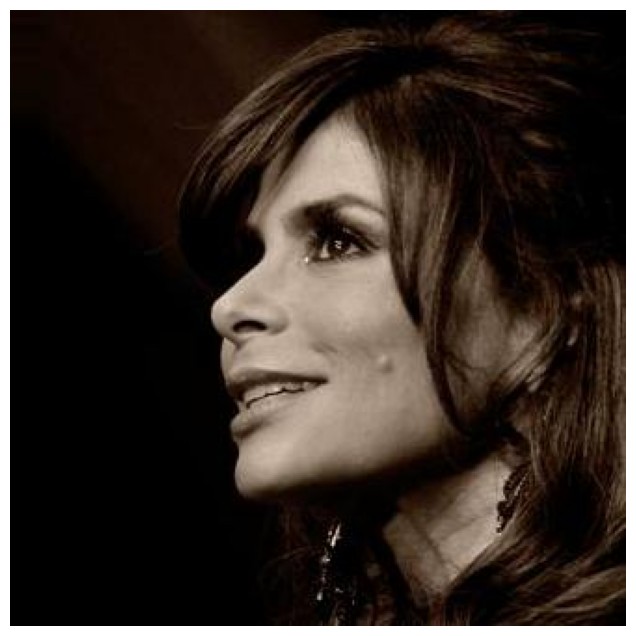

In [34]:
fig = plt.figure(figsize = (8, 8))
plt.axis('off')
plt.imshow(img[:, :, ::-1])
plt.show()

# Facial Landmarks Detector

In [35]:
mp_face_mesh = mediapipe.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

In [36]:
results = face_mesh.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [37]:
landmarks = results.multi_face_landmarks[0]

In [62]:
data = []
for point in results.multi_face_landmarks[0].landmark:
    data.append([point.x, point.y, point.z])

np.array(data).shape

(468, 3)

In [51]:
for l in results.multi_face_landmarks[0].landmark:
    print(l)

x: 0.38313233852386475
y: 0.5705856680870056
z: -0.047306958585977554

x: 0.34625303745269775
y: 0.502070963382721
z: -0.0721701830625534

x: 0.3853318691253662
y: 0.5311604738235474
z: -0.04378543794155121

x: 0.3648035526275635
y: 0.4397832751274109
z: -0.03288624435663223

x: 0.34496262669563293
y: 0.48045262694358826
z: -0.07414400577545166

x: 0.3579980134963989
y: 0.4561347961425781
z: -0.06587909907102585

x: 0.4013686776161194
y: 0.3970877528190613
z: -0.021563420072197914

x: 0.36885178089141846
y: 0.3949424624443054
z: 0.1276339292526245

x: 0.41385048627853394
y: 0.34796419739723206
z: -0.00427430821582675

x: 0.41213178634643555
y: 0.3208211064338684
z: -0.002185695106163621

x: 0.4298626780509949
y: 0.22642549872398376
z: 0.024452270939946175

x: 0.38546210527420044
y: 0.5809171199798584
z: -0.04637233167886734

x: 0.3909532427787781
y: 0.5897529721260071
z: -0.04361072927713394

x: 0.3979722261428833
y: 0.5942739248275757
z: -0.03880186751484871

x: 0.397224098443985
y: 0

In [ ]:
df = pd.DataFrame(list(mp_face_mesh.FACEMESH_FACE_OVAL), columns = ["p1", "p2"])

In [ ]:
df.head()

,p1,p2
0,176,149
1,297,332
2,150,136
3,109,10
4,356,454


In [ ]:
print(f"Face oval consists of {df.shape[0]} lines")

Face oval consists of 36 lines


## Order landmark points

In [ ]:
routes_idx = []

p1 = df.iloc[0]["p1"]
p2 = df.iloc[0]["p2"]

for i in range(0, df.shape[0]):
    
    #print(p1, p2)
    
    obj = df[df["p1"] == p2]
    p1 = obj["p1"].values[0]
    p2 = obj["p2"].values[0]
    
    route_idx = []
    route_idx.append(p1)
    route_idx.append(p2)
    routes_idx.append(route_idx)

In [ ]:
routes_idx[0:5]

[[149, 150], [150, 136], [136, 172], [172, 58], [58, 132]]

In [ ]:
display_items = 5
for idx, route_idx in enumerate(routes_idx[0:display_items] + routes_idx[-display_items:]):
    print(f"Draw a line between {route_idx[0]}th landmark point to {route_idx[1]}th landmark point")
    if idx == display_items - 1:
        print("\n...\n")

Draw a line between 149th landmark point to 150th landmark point
Draw a line between 150th landmark point to 136th landmark point
Draw a line between 136th landmark point to 172th landmark point
Draw a line between 172th landmark point to 58th landmark point
Draw a line between 58th landmark point to 132th landmark point

...

Draw a line between 400th landmark point to 377th landmark point
Draw a line between 377th landmark point to 152th landmark point
Draw a line between 152th landmark point to 148th landmark point
Draw a line between 148th landmark point to 176th landmark point
Draw a line between 176th landmark point to 149th landmark point


## Find the 2D coordinate values of each landmark point

In [ ]:
routes = []

#for source_idx, target_idx in mp_face_mesh.FACEMESH_FACE_OVAL:
for source_idx, target_idx in routes_idx:
    
    source = landmarks.landmark[source_idx]
    target = landmarks.landmark[target_idx]
        
    relative_source = (int(img.shape[1] * source.x), int(img.shape[0] * source.y))
    relative_target = (int(img.shape[1] * target.x), int(img.shape[0] * target.y))

    #cv2.line(img, relative_source, relative_target, (255, 255, 255), thickness = 2)
    
    routes.append(relative_source)
    routes.append(relative_target)

In [ ]:
print(f"There are {len(routes)} landmark points available")

There are 72 landmark points available


In [ ]:
routes[0:10]

[(131, 235),
 (133, 229),
 (133, 229),
 (136, 222),
 (136, 222),
 (140, 213),
 (140, 213),
 (143, 200),
 (143, 200),
 (145, 184)]

## Extract the inner area of facial landmarks

In [ ]:
mask = np.zeros((img.shape[0], img.shape[1]))
mask = cv2.fillConvexPoly(mask, np.array(routes), 1)
mask = mask.astype(bool)
 
out = np.zeros_like(img)
out[mask] = img[mask]

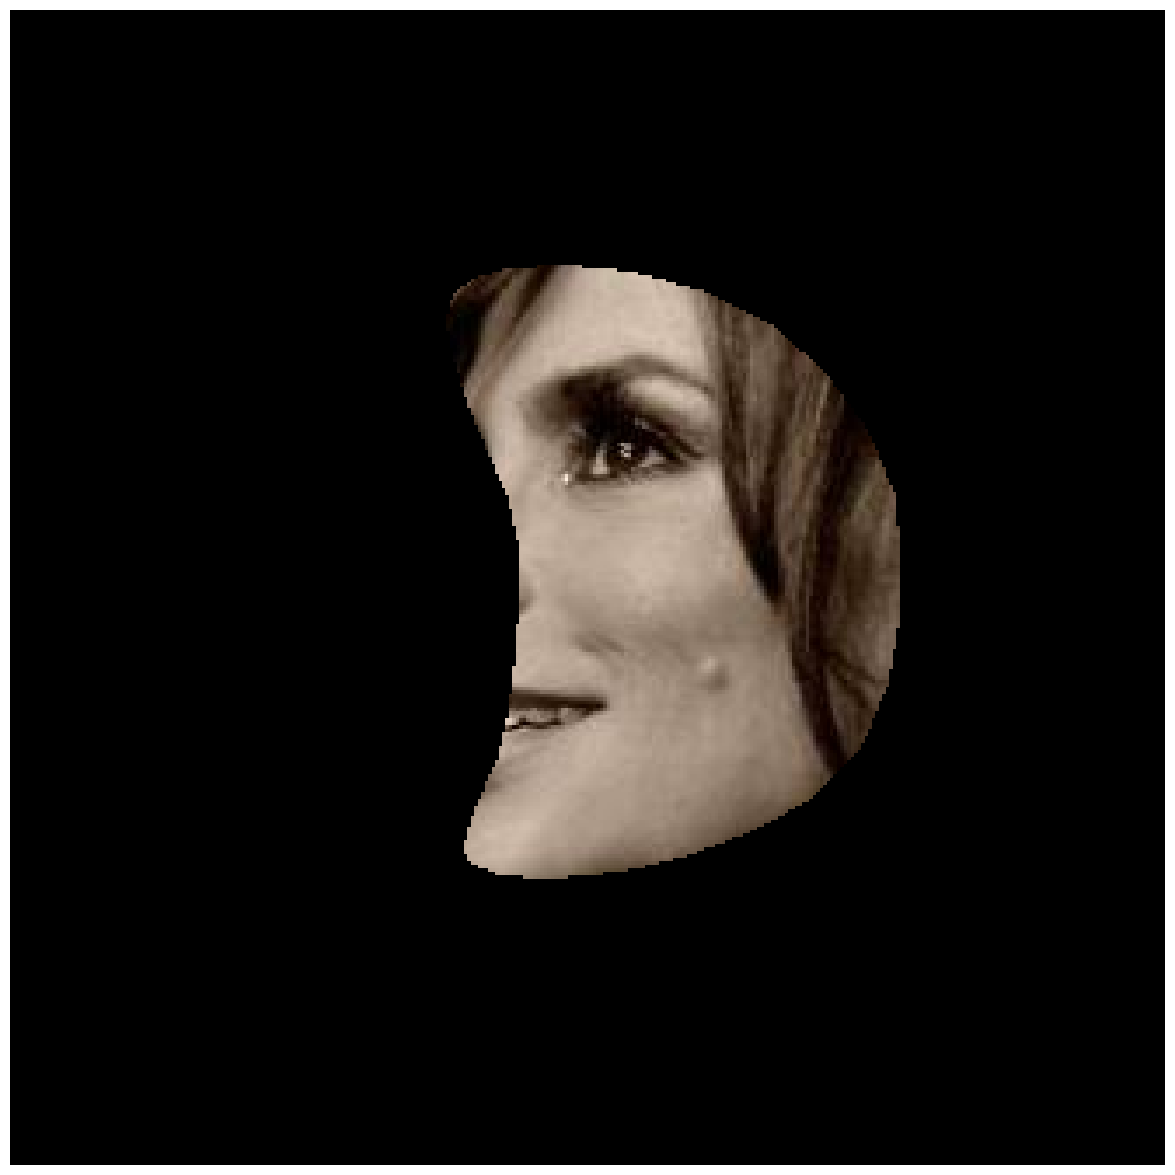

In [ ]:
fig = plt.figure(figsize = (15, 15))
plt.axis('off')
plt.imshow(out[:, :, ::-1])